# Задание 08.  Методы снижения размерности

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Линейные методы

## Задание 1: Применение метода главных компонент (PCA).
Используйте набор данных "Iris" из sklearn.datasets. Примените PCA, чтобы снизить размерность до 2-х и визуализируйте результаты.


Загружаем данные

In [5]:
from sklearn.datasets import load_iris

data = load_iris(as_frame=True)
data.frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Выясним, есть ли в наборе данных пропущенные значения

In [8]:
data.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


Рассмотрим описательные статистики для данных

In [9]:
data.frame.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Записываем независимые факторы в переменную $X$ и зависимый фактор в переменную $y$.

In [6]:
X = data.data
y = data.target

Загрузим из библиотеки sklearn модель PCA. Укажем в параметрах модели, что мы понижаем размерность до двух компонент

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

Трансформируем данные

In [12]:
X_transformed = pca.fit_transform(X)

Образуем датасет, используя новые компоненты

In [33]:
data_transformed = pd.DataFrame(X_transformed, columns = ['component 1', 'component 2'])
data_transformed['target']=data.target_names[y]
data_transformed

,component 1,component 2,target
0,-2.684126,0.319397,setosa
1,-2.714142,-0.177001,setosa
2,-2.888991,-0.144949,setosa
3,-2.745343,-0.318299,setosa
4,-2.728717,0.326755,setosa
...,...,...,...
145,1.944110,0.187532,virginica
146,1.527167,-0.375317,virginica
147,1.764346,0.078859,virginica
148,1.900942,0.116628,virginica


Визуализируем полученный результат

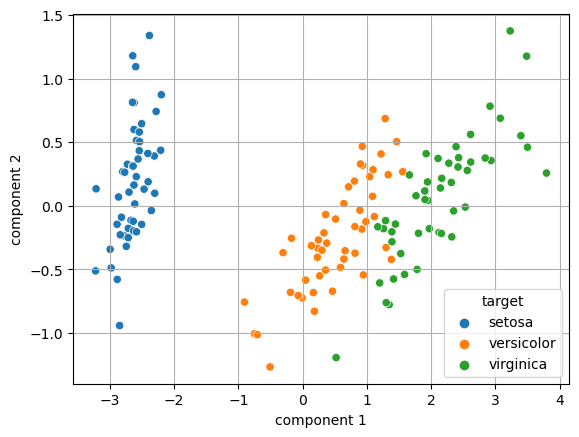

In [36]:
sns.scatterplot(data=data_transformed, x='component 1', y='component 2', hue='target')
plt.grid(True)
plt.show()

## Задание 2: Сравнение PCA и Factor Analysis.
Используйте набор данных "Wine" из sklearn.datasets. Примените PCA и Factor Analysis, чтобы снизить размерность до 2-х и визуализируйте различия в результатах.


Загружаем данные

In [56]:
from sklearn.datasets import load_wine

data = load_wine(as_frame=True)
data.frame.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Выясним, есть ли в наборе данных пропущенные значения

In [57]:
data.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

Рассмотрим описательные статистики для данных

In [58]:
data.frame.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Записываем независимые факторы в переменную $X$ и зависимый фактор в переменную $y$.

In [59]:
X = data.data
y = data.target

Загрузим из библиотеки sklearn модели PCA и Factor Analysis. Укажем в параметрах модели, что мы понижаем размерность до двух компонент

In [60]:
from sklearn.decomposition import FactorAnalysis

pca = PCA(n_components=2)
fa = FactorAnalysis(n_components=2)

Трансформируем данные и образуем датасет для PCA, используя новые компоненты

In [61]:
X_transformed_pca = pca.fit_transform(X)
data_transformed_pca = pd.DataFrame(X_transformed_pca, columns = ['component 1', 'component 2'])
data_transformed_pca['target']=data.target_names[y]
data_transformed_pca

,component 1,component 2,target
0,318.562979,21.492131,class_0
1,303.097420,-5.364718,class_0
2,438.061133,-6.537309,class_0
3,733.240139,0.192729,class_0
4,-11.571428,18.489995,class_0
...,...,...,...
173,-6.980211,-4.541137,class_2
174,3.131605,2.335191,class_2
175,88.458074,18.776285,class_2
176,93.456242,18.670819,class_2


Трансформируем данные и образуем датасет для FA, используя новые компоненты

In [62]:
X_transformed_fa = fa.fit_transform(X)
data_transformed_fa = pd.DataFrame(X_transformed_fa, columns = ['component 1', 'component 2'])
data_transformed_fa['target']=data.target_names[y]
data_transformed_fa

,component 1,component 2,target
0,1.014253,1.641534,class_0
1,0.964953,-0.396465,class_0
2,1.394774,-0.497568,class_0
3,2.334586,0.013077,class_0
4,-0.036813,1.408300,class_0
...,...,...,...
173,-0.022237,-0.350794,class_2
174,0.009994,0.169780,class_2
175,0.281600,1.422546,class_2
176,0.297517,1.415189,class_2


Визуализируем полученный результат

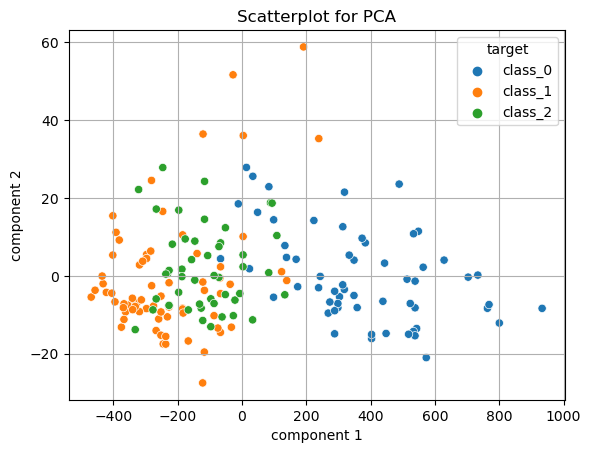

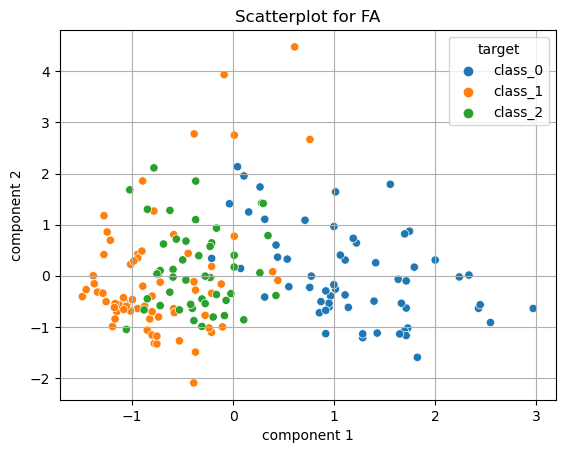

In [63]:
sns.scatterplot(data=data_transformed_pca, x='component 1', y='component 2', hue='target')
plt.grid(True)
plt.title('Scatterplot for PCA')
plt.show()

sns.scatterplot(data=data_transformed_fa, x='component 1', y='component 2', hue='target')
plt.grid(True)
plt.title('Scatterplot for FA')
plt.show()

## Задание 3: Исследование влияния предобработки данных на результаты PCA.
Используйте набор данных "Boston Housing" из sklearn.datasets. Примените различные методы предобработки (например, масштабирование, нормализацию) перед применением PCA и сравните полученные результаты.

Загружаем данные

In [65]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)
data.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Выясним, есть ли в наборе данных пропущенные значения

In [66]:
data.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Рассмотрим описательные статистики для данных

In [67]:
data.frame.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Записываем независимые факторы в переменную $X$ и зависимый фактор в переменную $y$.

In [68]:
X = data.data
y = data.target

Применим методы масштабирования и нормализации к данным

In [73]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X_standard = StandardScaler().fit_transform(X)
X_scaled = MinMaxScaler().fit_transform(X)

Загрузим из библиотеки sklearn модели PCA. Укажем в параметрах модели, что мы понижаем размерность до двух компонент

In [70]:
pca = PCA(n_components=2)

Трансформируем стандартизированные данные и образуем датасет для PCA, используя новые компоненты

In [79]:
X_standard_transformed = pca.fit_transform(X_standard)
data_standard_transformed = pd.DataFrame(X_standard_transformed, columns = ['component 1', 'component 2'])
data_standard_transformed['target']=y
data_standard_transformed.describe()

,component 1,component 2,target
count,2.064000e+04,2.064000e+04,20640.000000
mean,8.812933e-17,-4.406467e-17,2.068558
std,1.423744e+00,1.371638e+00,1.153956
min,-6.548384e+00,-3.224757e+00,0.149990
25%,-1.052516e+00,-7.749784e-01,1.196000
50%,-4.224928e-01,-1.907868e-02,1.797000
75%,1.112216e+00,6.140117e-01,2.647250
max,5.161416e+01,6.219408e+01,5.000010


Трансформируем масштабированные данные и образуем датасет для PCA, используя новые компоненты

In [78]:
X_scaled_transformed = pca.fit_transform(X_scaled)
data_scaled_transformed = pd.DataFrame(X_scaled_transformed, columns = ['component 1', 'component 2'])
data_scaled_transformed['target']=y
data_scaled_transformed.describe()

,component 1,component 2,target
count,2.064000e+04,2.064000e+04,20640.000000
mean,1.101617e-17,-4.406467e-17,2.068558
std,2.976867e-01,2.468064e-01,1.153956
min,-5.810183e-01,-5.291411e-01,0.149990
25%,-2.340708e-01,-1.799236e-01,1.196000
50%,-1.531827e-01,-5.523716e-03,1.797000
75%,3.061219e-01,1.993687e-01,2.647250
max,7.857973e-01,6.211951e-01,5.000010


Визуализируем полученный результат

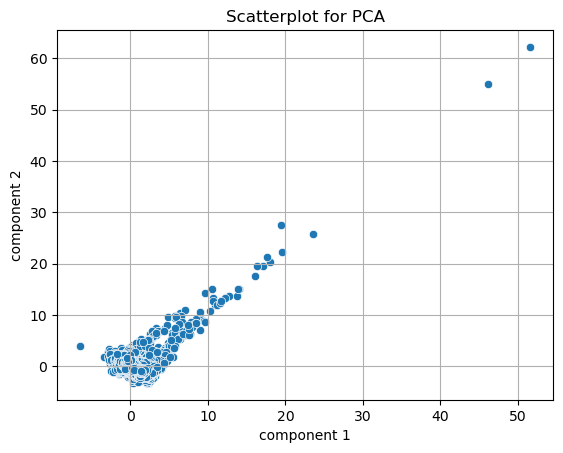

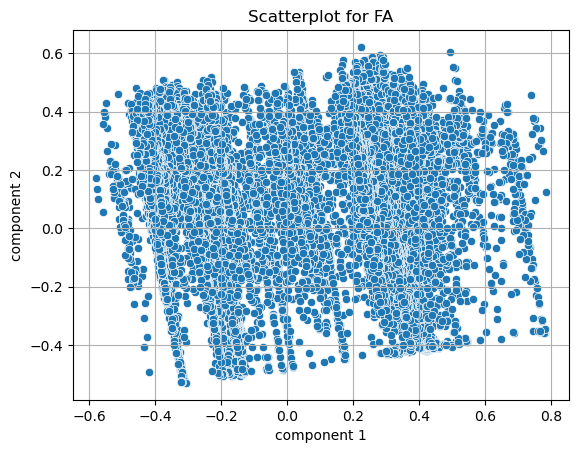

In [77]:
sns.scatterplot(data=data_standard_transformed, x='component 1', y='component 2')
plt.grid(True)
plt.title('Scatterplot for PCA')
plt.show()

sns.scatterplot(data=data_scaled_transformed, x='component 1', y='component 2')
plt.grid(True)
plt.title('Scatterplot for FA')
plt.show()

## Задание 4: Применение Disciminant Analysis.
Используйте набор данных "Iris" из sklearn.datasets. Примените Linear Discriminant Analysis (LDA) и Quadratic Discriminant Analysis (QDA), чтобы снизить размерность до 2-х и визуализируйте результаты.


Загружаем данные

In [80]:
from sklearn.datasets import load_iris

data = load_iris(as_frame=True)
data.frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Записываем независимые факторы в переменную $X$ и зависимый фактор в переменную $y$.

In [81]:
X = data.data
y = data.target

Загрузим из библиотеки sklearn модели PCA и Factor Analysis. Укажем в параметрах модели, что мы понижаем размерность до двух компонент

In [82]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)

Трансформируем данные и образуем датасет для PCA, используя новые компоненты

In [83]:
X_transformed_lda = lda.fit_transform(X, y)
data_transformed_lda = pd.DataFrame(X_transformed_lda, columns = ['component 1', 'component 2'])
data_transformed_lda['target']=data.target_names[y]
data_transformed_lda

,component 1,component 2,target
0,8.061800,0.300421,setosa
1,7.128688,-0.786660,setosa
2,7.489828,-0.265384,setosa
3,6.813201,-0.670631,setosa
4,8.132309,0.514463,setosa
...,...,...,...
145,-5.645003,1.677717,virginica
146,-5.179565,-0.363475,virginica
147,-4.967741,0.821141,virginica
148,-5.886145,2.345091,virginica


Визуализируем полученный результат

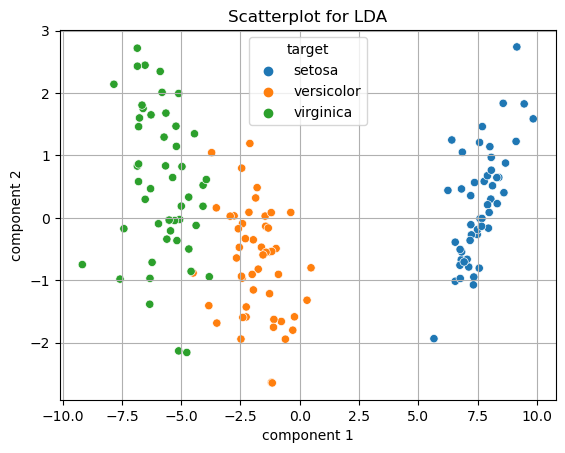

In [84]:
sns.scatterplot(data=data_transformed_lda, x='component 1', y='component 2', hue='target')
plt.grid(True)
plt.title('Scatterplot for LDA')
plt.show()

## Задание 5: Сравнение PCA и LDA.
Используйте любой набор данных с классифицирующей моделью. Примените PCA и LDA и сравните, как влияют эти методы снижения размерности на эффективность классификации.


Возьмем данные из предыдущего задания. Добавим к ним трансформацию через PCApca = PCA(n_components=2)

In [86]:
pca = PCA(n_components=2)
X_transformed_pca = pca.fit_transform(X)
data_transformed_pca = pd.DataFrame(X_transformed_pca, columns = ['component 1', 'component 2'])
data_transformed_pca['target']=data.target_names[y]
data_transformed_pca

,component 1,component 2,target
0,-2.684126,0.319397,setosa
1,-2.714142,-0.177001,setosa
2,-2.888991,-0.144949,setosa
3,-2.745343,-0.318299,setosa
4,-2.728717,0.326755,setosa
...,...,...,...
145,1.944110,0.187532,virginica
146,1.527167,-0.375317,virginica
147,1.764346,0.078859,virginica
148,1.900942,0.116628,virginica


Обучим модель логистической регрессии на первоначальных данных, PCA и LDA трансформациях. Сравним значение accuracy

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X, y)
mse_default = accuracy_score(y, logreg.predict(X))
mse_default

0.9733333333333334

In [93]:
logreg.fit(X_transformed_pca, y)
mse_pca = accuracy_score(y, logreg.predict(X_transformed_pca))
mse_pca

0.9666666666666667

In [94]:
logreg.fit(X_transformed_lda, y)
mse_lda = accuracy_score(y, logreg.predict(X_transformed_lda))
mse_lda

0.98

Таким образом, после LDA-трансформации точность классификации стала выше, а после PCA-трансформации -- ниже.

# Нелинейные методы

## Задание 1: Применение метода t-SNE.
Используйте набор данных "Iris" из sklearn.datasets. Примените t-SNE, чтобы снизить размерность до 2-х, и визуализируйте результаты


Возьмем данные из предыдущей задачи

Загрузим из sklearn метод tSNE

In [142]:
from sklearn.manifold import TSNE

tSNE = TSNE(n_components=2, perplexity=10)

Трансформируем данные и образуем датасет, используя новые компоненты

In [143]:
X_transformed = tSNE.fit_transform(X)
data_transformed = pd.DataFrame(X_transformed, columns = ['component 1', 'component 2'])
data_transformed['target']=data.target_names[y]
data_transformed

,component 1,component 2,target
0,-41.022472,-3.568356,setosa
1,-36.426918,-13.736955,setosa
2,-32.601223,-10.664034,setosa
3,-33.439049,-11.900125,setosa
4,-39.439690,-3.272820,setosa
...,...,...,...
145,17.213123,-15.381453,virginica
146,14.329941,1.608326,virginica
147,17.549248,-12.452100,virginica
148,20.169477,-14.796489,virginica


Визуализируем полученный результат

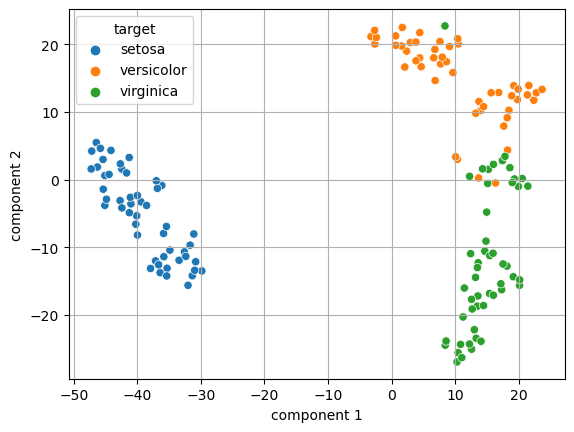

In [144]:
sns.scatterplot(data=data_transformed, x='component 1', y='component 2', hue='target')
plt.grid(True)
plt.show()

## Задание 2: Определение влияния параметров t-SNE.
Используйте тот же набор данных "Iris". Примените t-SNE с разными значениями параметров (например, число итераций, learning rate) и сравните полученные результаты.


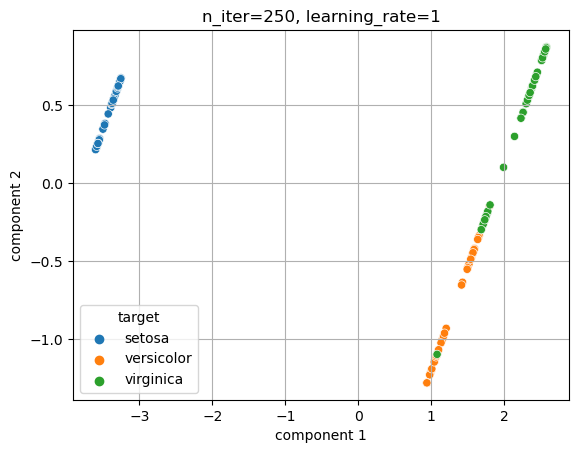

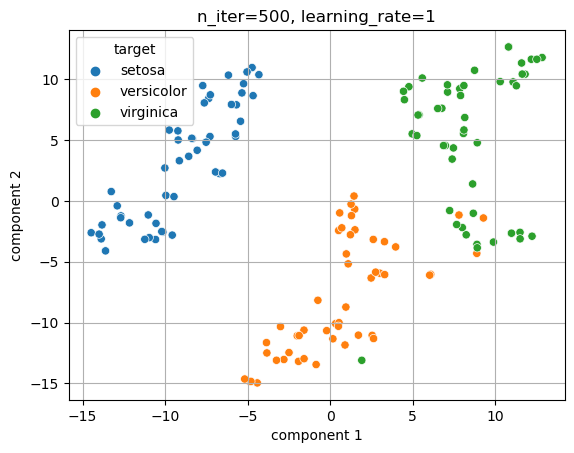

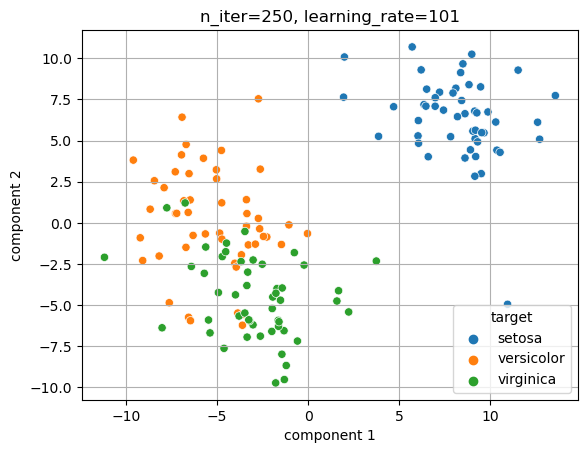

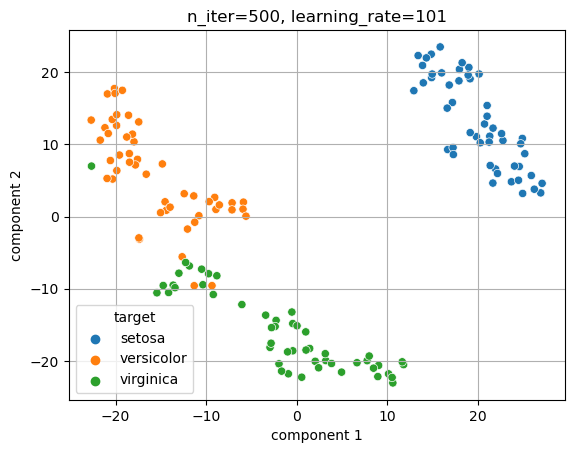

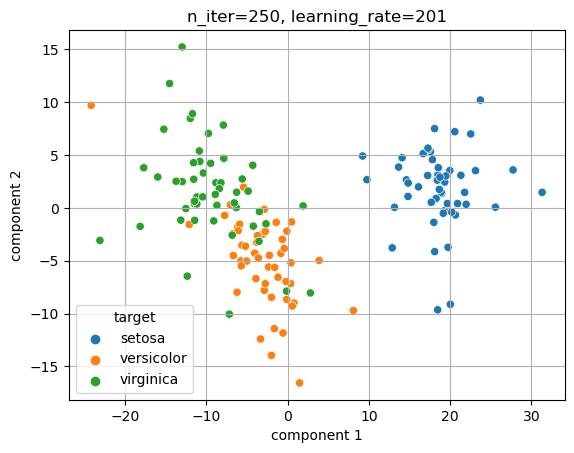

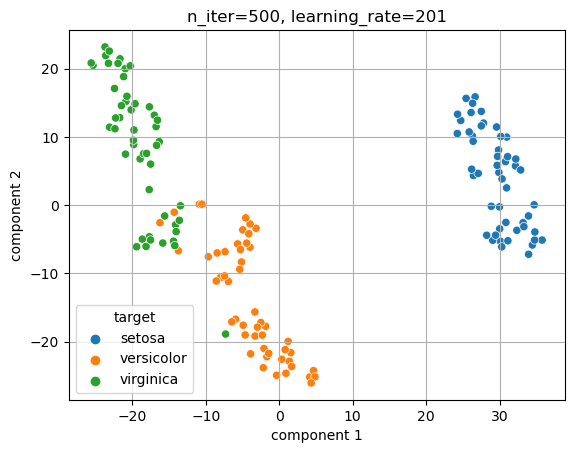

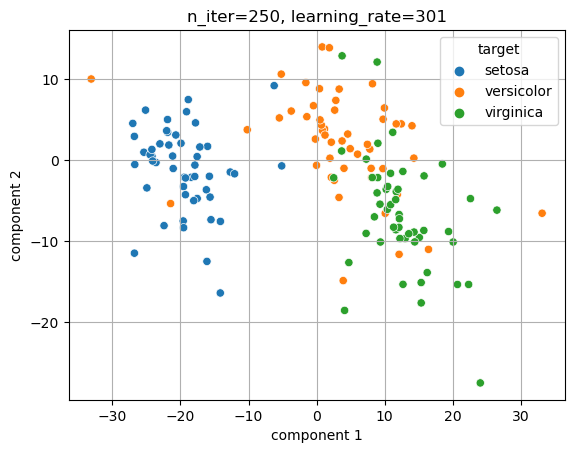

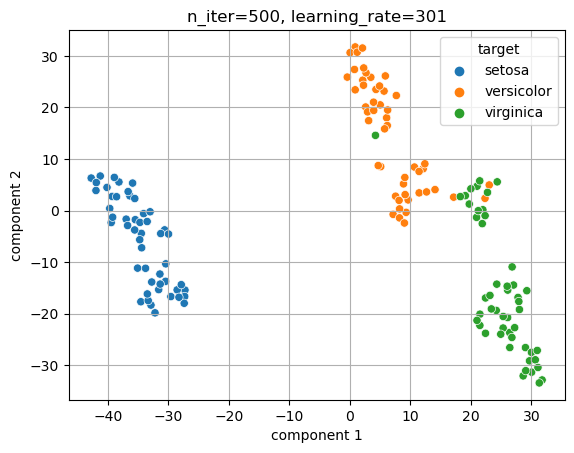

In [151]:
for learning_rate in range(1, 311, 100):
    for n_iter in range(250, 501, 250):
        tSNE = TSNE(n_components=2, n_iter=n_iter, learning_rate=learning_rate, perplexity=10)
        X_transformed = tSNE.fit_transform(X)
        data_transformed = pd.DataFrame(X_transformed, columns = ['component 1', 'component 2'])
        data_transformed['target']=data.target_names[y]
        sns.scatterplot(data=data_transformed, x='component 1', y='component 2', hue='target')
        plt.title('n_iter=' + str(n_iter) + ', learning_rate=' + str(learning_rate))
        plt.grid(True)
        plt.show()

## Задание 3: Сравнение t-SNE и PCA.
Используйте любой набор данных на ваше усмотрение. Примените PCA и t-SNE, чтобы снизить размерность до 2-х, и сравните разницы в результатах визуализации.


Рассмотрим решение этой задачи на наборе данных ирисов

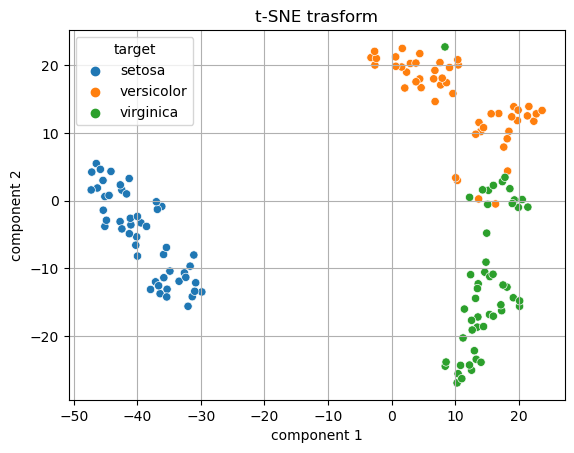

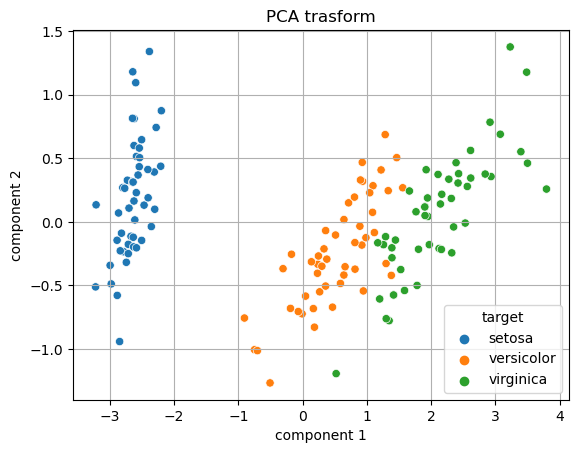

In [156]:
tSNE = TSNE(n_components=2, perplexity=10)
X_transformed_tsne = tSNE.fit_transform(X)
data_transformed_tsne = pd.DataFrame(X_transformed_tsne, columns = ['component 1', 'component 2'])
data_transformed_tsne['target']=data.target_names[y]
sns.scatterplot(data=data_transformed_tsne, x='component 1', y='component 2', hue='target')
plt.title('t-SNE trasform')
plt.grid(True)
plt.show()

pca = PCA(n_components=2)
X_transformed_pca = pca.fit_transform(X)
data_transformed_pca = pd.DataFrame(X_transformed_pca, columns = ['component 1', 'component 2'])
data_transformed_pca['target']=data.target_names[y]
sns.scatterplot(data=data_transformed_pca, x='component 1', y='component 2', hue='target')
plt.title('PCA trasform')
plt.grid(True)
plt.show()

## Задание 4: Применение UMAP.
Используйте набор данных "MNIST" (например, содержащийся в sklearn.datasets). Примените UMAP для снижения размерности и визуализируйте результаты.


Загружаем данные

In [157]:
from sklearn.datasets import load_digits

data = load_digits(as_frame=True)
data.frame.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


Выясним, есть ли в наборе данных пропущенные значения

In [158]:
data.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

Рассмотрим описательные статистики для данных

In [159]:
data.frame.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


Записываем независимые факторы в переменную $X$ и зависимый фактор в переменную $y$.

In [160]:
X = data.data
y = data.target

Загрузим UMAP

In [165]:
#!pip install umap-learn

Трансформируем признаки с помощью UMAP

In [166]:
import umap

X_transformed = umap.UMAP(random_state=42).fit_transform(X)
data_transformed = pd.DataFrame(X_transformed, columns = ['component 1', 'component 2'])
data_transformed['target']=data.target_names[y]
data_transformed

C:\Users\bzzdwn\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


,component 1,component 2,target
0,16.240307,10.023943,0
1,1.843067,12.582959,1
2,1.749987,9.238558,2
3,-0.362722,3.975835,3
4,6.308415,18.930088,4
...,...,...,...
1792,-4.203546,7.111685,9
1793,17.207016,10.558121,0
1794,0.611709,10.249985,8
1795,-3.551199,7.156513,9


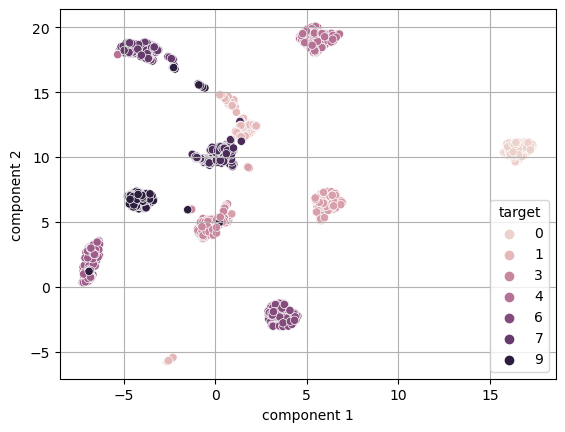

In [167]:
sns.scatterplot(data=data_transformed, x='component 1', y='component 2', hue='target')
plt.grid(True)
plt.show()

## Задание 5: Сравнение UMAP и t-SNE.
Используйте один и тот же набор данных для применения UMAP и t-SNE. Сравните влияние этих методов снижения размерности на визуальное разделение классов в данных


Возьмем данные об ирисах

In [174]:
data = load_iris(as_frame=True)
X = data.data
y = data.target

In [176]:
tSNE = TSNE(n_components=2, perplexity=10)
X_transformed = tSNE.fit_transform(X)
data_transformed_tsne = pd.DataFrame(X_transformed, columns = ['component 1', 'component 2'])
data_transformed_tsne['target']=data.target_names[y]
data_transformed_tsne

,component 1,component 2,target
0,-41.022472,-3.568356,setosa
1,-36.426918,-13.736955,setosa
2,-32.601223,-10.664034,setosa
3,-33.439049,-11.900125,setosa
4,-39.439690,-3.272820,setosa
...,...,...,...
145,17.213123,-15.381453,virginica
146,14.329941,1.608326,virginica
147,17.549248,-12.452100,virginica
148,20.169477,-14.796489,virginica


In [177]:
X_transformed = umap.UMAP(random_state=42).fit_transform(X)
data_transformed_umap = pd.DataFrame(X_transformed, columns = ['component 1', 'component 2'])
data_transformed_umap['target']=data.target_names[y]
data_transformed_umap

C:\Users\bzzdwn\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


,component 1,component 2,target
0,23.780241,6.730713,setosa
1,22.177048,5.553263,setosa
2,22.803904,5.305920,setosa
3,22.631916,5.196632,setosa
4,24.000282,6.377219,setosa
...,...,...,...
145,1.812419,1.328595,virginica
146,1.064210,4.263456,virginica
147,1.794876,1.832525,virginica
148,1.502048,1.215638,virginica


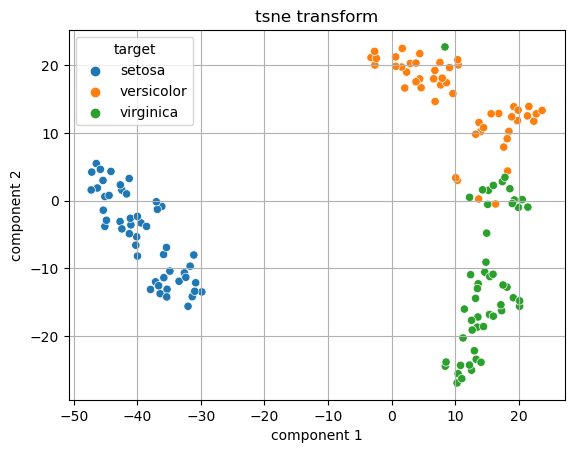

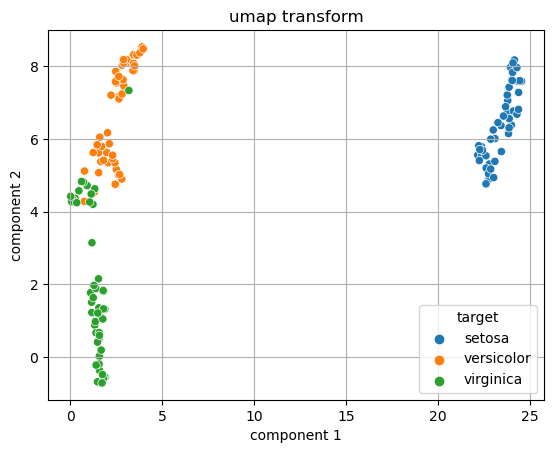

In [179]:
sns.scatterplot(data=data_transformed_tsne, x='component 1', y='component 2', hue='target')
plt.grid(True)
plt.title('tsne transform')
plt.show()

sns.scatterplot(data=data_transformed_umap, x='component 1', y='component 2', hue='target')
plt.grid(True)
plt.title('umap transform')
plt.show()